In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import math
import itertools
from IPython.display import Image, display
import shutil
%matplotlib inline

In [2]:
input = "data2/"

In [4]:
df = pd.DataFrame()
users = os.listdir(input)

In [6]:
for u in users:
    sessions = os.listdir(input + u)
    for sess in sessions:
        path = input + u + "/" + sess
        tmp = pd.read_csv(path)
        df = df.append(tmp)

In [7]:
df.count()

record timestamp    1157823
client timestamp    1157823
button              1157823
state               1157823
x                   1157823
y                   1157823
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69099531d0>,
      dtype=object)

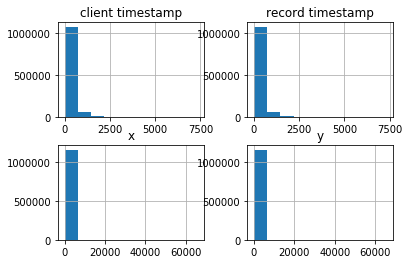

In [10]:
df.hist()

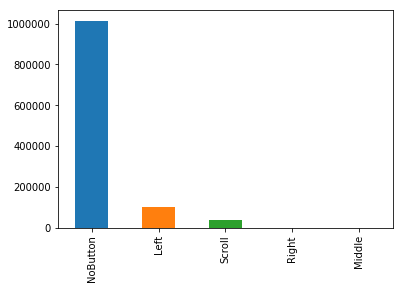

In [11]:
df['button'].value_counts().plot(kind='bar')

In [12]:
df['button'].value_counts()

NoButton    1013577
Left         104857
Scroll        38531
Right           856
Middle            2
Name: button, dtype: int64

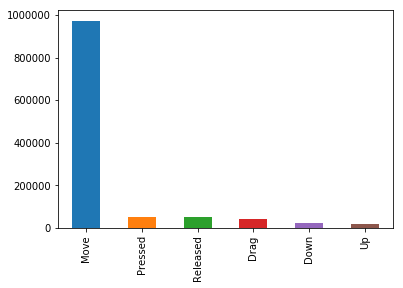

In [13]:
df['state'].value_counts().plot(kind='bar')

In [14]:
df['state'].value_counts()

Move        972407
Pressed      52859
Released     52856
Drag         41170
Down         22262
Up           16269
Name: state, dtype: int64

In [16]:
df.describe()

,record timestamp,client timestamp,x,y
count,1.157823e+06,1.157823e+06,1.157823e+06,1.157823e+06
mean,2.771096e+02,2.770784e+02,4.344415e+02,3.883484e+02
std,4.192562e+02,4.192602e+02,6.772338e+02,6.318825e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.867350e+01,6.862500e+01,2.020000e+02,2.120000e+02
50%,1.652720e+02,1.652360e+02,3.280000e+02,3.650000e+02
75%,3.302655e+02,3.302390e+02,5.820000e+02,5.320000e+02
max,7.317445e+03,7.317367e+03,6.553500e+04,6.553500e+04


In [18]:
for col in df.columns:
    if col in ["record timestamp", "client timestamp"]:
        continue
    else:
        print(col, len(df[col].unique()))

button 5
state 6
x 1935
y 1089


In [19]:
print(df.x.max(), df.y.max(), df.x.min(), df.y.min())

65535 65535 0 0


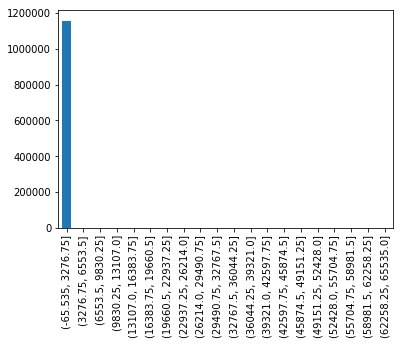

In [20]:
o, bins = pd.cut(df.x, 20, retbins=True)
o.value_counts(sort=False).plot.bar()

In [22]:
df.x.sort_values().unique()[-10:]

array([ 1939,  1940,  1942,  1943,  1948,  1967,  1976,  1982,  1983,
       65535])

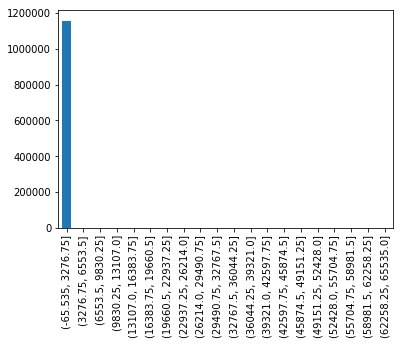

In [23]:
o, bins = pd.cut(df.y, 20, retbins=True)
o.value_counts(sort=False).plot.bar()

In [25]:
df.y.sort_values().unique()[-20:]

array([ 1069,  1070,  1071,  1072,  1073,  1074,  1075,  1076,  1077,
        1078,  1079,  1087,  1088,  1089,  1090,  1091,  1092,  1147,
        1151, 65535])

In [26]:
MAX_X_ALLOWED = 1920
MAX_Y_ALLOWED = 1080

In [35]:
df[df["x"] > MAX_X_ALLOWED].count()

record timestamp    115
client timestamp    115
button              115
state               115
x                   115
y                   115
dtype: int64

In [36]:
df[df["y"] > MAX_Y_ALLOWED].count()

record timestamp    104
client timestamp    104
button              104
state               104
x                   104
y                   104
dtype: int64

In [41]:
df[(df["y"] > MAX_Y_ALLOWED) & (df["x"] > MAX_X_ALLOWED)].count()

record timestamp    101
client timestamp    101
button              101
state               101
x                   101
y                   101
dtype: int64

In [43]:
df[(df["y"] > MAX_Y_ALLOWED) | (df["x"] > MAX_X_ALLOWED)].count()

record timestamp    118
client timestamp    118
button              118
state               118
x                   118
y                   118
dtype: int64